In [15]:
import scipy
from scipy.optimize.minpack import curve_fit
import numpy 
import matplotlib.pyplot

# T1

define the fit

In [16]:

def model_func2(x, a, c, d):
    return a*(1-d*numpy.exp((-2*x)/c))

def fit_exp(x, y):
    opt_parms, parm_cov = scipy.optimize.minpack.curve_fit(model_func2, x, y, p0=(-30000,0.01, 1))
    A, C, D = opt_parms
    perr = [numpy.sqrt(numpy.diag(parm_cov))]
    return A, C, D, perr


import the data

In [17]:
data0=numpy.loadtxt(fname='Oxygen_T1.csv', delimiter=',')
tau0 = (data0[:,0])
IS0 = (data0[:,1])

fit the data

[array([4.49117453e+02, 5.04845427e-07, 6.84486498e-02])]
T1 is 1.1659169132244307e-05
Delay time has to be at least 5.8295845661221533e-05 seconds


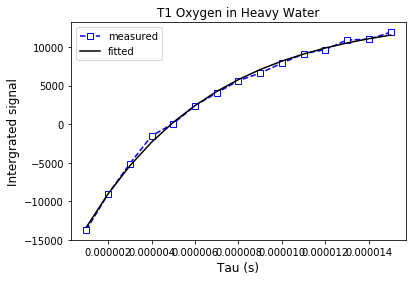

In [18]:
A, T1, D, perr = fit_exp(tau0,IS0)

print (perr)
print ('T1 is', T1)
print ('Delay time has to be at least', 5*T1,'seconds')


fit_y = model_func2(tau0, A, T1, D)

#plot the data
matplotlib.pyplot.xlabel('Tau (s)', fontsize=12)
matplotlib.pyplot.ylabel('Intergrated signal', fontsize=12)
fig = matplotlib.pyplot.title('T1 Oxygen in Heavy Water', fontsize=12)
fig = matplotlib.pyplot.plot(tau0, IS0, linewidth=1.5, color='b', linestyle = '--', marker='s', markeredgecolor='b', markerfacecolor='white', label='measured')
fig = matplotlib.pyplot.plot(tau0, fit_y, linewidth=1.5, color='k', linestyle = '-', marker='', markeredgecolor='k', markerfacecolor='white', label='fitted')
fig=matplotlib.pyplot.legend()
figE = matplotlib.pyplot.show()


# T2

In [19]:
def model_func2(x, a, c):
    return a*(numpy.exp((-2*x)/c))


def fit_exp(x, y):
    opt_parms, parm_cov = scipy.optimize.minpack.curve_fit(model_func2, x, y, p0=(70,0.02))
    A, C = opt_parms
    perr = [numpy.sqrt(numpy.diag(parm_cov))]
    return A, C, perr

In [20]:
data3=numpy.loadtxt(fname='Oxygen_T2.csv', delimiter=',')

X3= (data3[:,0])

Y3=(data3[:,1])


In [21]:

A, T2,  perr = fit_exp(X3[0:6],Y3[0:6])

print (perr)
print ('T2 is', T2)



fit_y = model_func2(X3, A, C)



matplotlib.pyplot.xlabel('Tau (s)', fontsize=12)
matplotlib.pyplot.ylabel('Intergrated signal', fontsize=12)
fig = matplotlib.pyplot.title('T2 test', fontsize=12)

fig = matplotlib.pyplot.plot(X3, Y3, linewidth=1.5, color='b', linestyle = '--', marker='s', markeredgecolor='b', markerfacecolor='white', label='measured')

fig = matplotlib.pyplot.plot(X3, fit_y, linewidth=1.5, color='k', linestyle = '-', marker='', markeredgecolor='k', markerfacecolor='white', label='fitted')


fig=matplotlib.pyplot.legend()

figE = matplotlib.pyplot.show()


[array([1.11855225e+00, 1.93562511e-04])]
T2 is 0.004612462625806852


NameError: name 'C' is not defined

In [22]:
gamma =36.264e6
print ('To use STE method with oxygen-17, this',gamma**2*(36**2)*(1.8e-9), 'should be bigger than this',4/((T2**2)*T1))


To use STE method with oxygen-17, this 3067813249.2288 should be bigger than this 16126000489.511562


In [23]:
print ('or ciftelli says this is the min diffusion coef', 4/(gamma*T2*T1*36), 'using STE method but I think it should be', 4/((36.264e6**2)*T2*T1*(36**2)))


or ciftelli says this is the min diffusion coef 0.056974604874144456 using STE method but I think it should be 4.3641846270976165e-11


In [227]:
gamma= 36.264e6
G=0.212
D=1.8e-9
print ('to use hahn echo T2 should be more than', (12/(gamma**2*G**2*D))**(1/3))
print ('T2 is', T2)

to use hahn echo T2 should be more than 0.04831647056734447
T2 is 0.08594973653027839
